In [1]:
import os
import scipy
import copy

import matplotlib.pyplot as plt
import numpy as np

from complex_network.networks import network_factory
from complex_network.networks.network_spec import NetworkSpec
from complex_network.perturbations.network_perturbator import (
    NetworkPerturbator,
)
from complex_network.perturbations import pole_finder

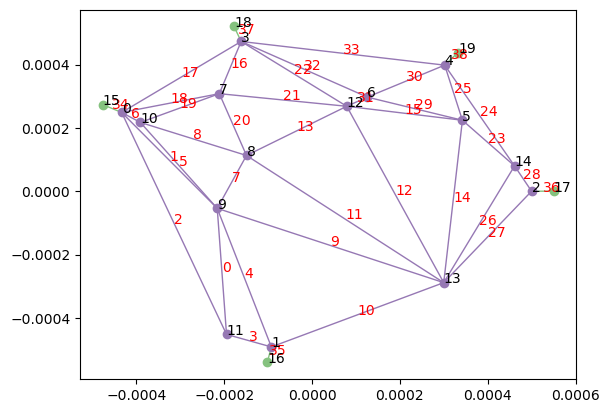

In [2]:
# Generate the random network
np.random.seed(1)
spec = NetworkSpec(
    network_type="delaunay",
    network_shape="circular",
    num_seed_nodes=0,
    external_offset=0.0,
    num_internal_nodes=15,
    num_external_nodes=5,
    network_size=500e-6,
    external_size=550e-6,
    node_S_mat_type="COE",
    node_S_mat_params={},
)
network = network_factory.generate_network(spec)
network.draw()

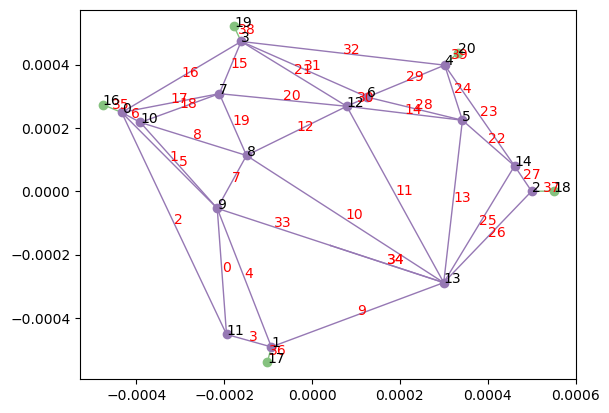

In [3]:
# Add the pseudo_node
network.add_node_to_link(9, 0.5, 0.0)
network.draw()

In [4]:
perturbator = NetworkPerturbator(network)

r_values = np.linspace(0.0, 1, 1000)

pole = 12532230.332102112 - 11.136143180724291j
poles, pole_shifts = perturbator.perturb_pseudonode_r_iterative(
    pole, 15, r_values
)

poles_direct= np.array(poles["direct"])
poles_wigner=np.array(poles["wigner"])

 68%|██████▊   | 677/1000 [06:02<04:26,  1.21it/s]

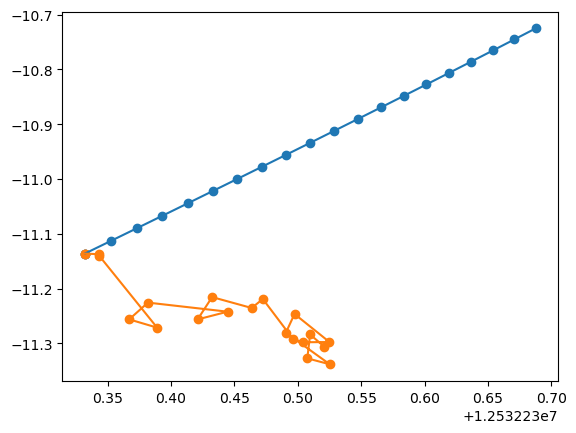

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.real(poles_direct), np.imag(poles_direct), color="tab:blue")
ax.scatter(np.real(poles_direct), np.imag(poles_direct), color="tab:blue")

ax.plot(np.real(poles_wigner), np.imag(poles_wigner), color="tab:orange")
ax.scatter(np.real(poles_wigner), np.imag(poles_wigner), color="tab:orange")

